# Transportation Profiles
Creates topographic profiles along or offset from from transportation routes.

Assumes transportation routes, from the National Transportation Dataset, align well with elevation data, from the Best Available Topographic dataset.

### Author
John Wall (jwall@Dewberry.com)

### Import libraries

In [29]:
import geopandas as gpd
from matplotlib import pyplot as plt

### Load data

In [85]:
streams = "/mnt/c/gis/fcast_data/sample_streams.shp"
roads = "/mnt/c/gis/fcast_data/sample_roads.shp"

### Initial processing

In [86]:
gdf_streams = gpd.read_file(streams)
gdf_streams.head(2)

,Join_Count,TARGET_FID,COMID,FDATE,RESOLUTION,GNIS_ID,GNIS_NAME,LENGTHKM,REACHCODE,FLOWDIR,...,MAX_,AVE,STDEV,GOTQ,NWISWEB,HUC,HUC_REG,SUBREGIONS,ACCOUNTING,geometry
0,1,407,9747396,1999-10-12,Medium,988957,Long Creek,6.556,03050102000189,With Digitized,...,2940.0,33.988,75.423,1,http://waterdata.usgs.gov/nwis/nwisman/?site_n...,03050102,03,0305,030501,LINESTRING Z (1263251.978737631 -451527.977621...


In [87]:
gdf_roads = gpd.read_file(roads)
gdf_roads.head(2)

,PERMANENT_,SOURCE_FEA,SOURCE_DAT,SOURCE_D_1,SOURCE_ORI,LOADDATE,INTERSTATE,INTERSTA_1,INTERSTA_2,INTERSTA_3,...,STATE_RO_2,STATE_RO_3,COUNTY_ROU,FEDERAL_LA,STCO_FIPSC,TNMFRC,FULL_STREE,MTFCC_CODE,SHAPE_Leng,geometry
0,8f249974-24ec-4a47-8fdd-cad7fef35901,1106092867736,{FBF2B128-FAA1-4076-8910-749C39CD00BF},2018 May MAF/TIGER,"U.S. Department of Commerce, U.S. Census Burea...",2019-05-13,None,None,None,None,...,None,None,None,None,37071,4,Hillcrest Rd,S1400,0.000796,LINESTRING (1268171.889787646 -453181.84868317...
1,60fbec8f-3606-481a-b574-1db508a2382a,1108311086747,{FBF2B128-FAA1-4076-8910-749C39CD00BF},2018 May MAF/TIGER,"U.S. Department of Commerce, U.S. Census Burea...",2019-05-13,None,None,None,None,...,None,None,None,None,37071,4,None,S1740,0.011924,LINESTRING (1264230.575675119 -450374.70059585...


### Filtering

In [96]:
# Stream of interest
stream = gdf[gdf["COMID"] == 9747396].to_crs(gdf_roads.crs)
stream_shape = list(stream.geometry)[0]

intersecting_roads = gdf_roads[gdf_roads.geometry.apply(lambda row: stream_shape.intersects(row))]

In [97]:
len(intersecting_roads)

3

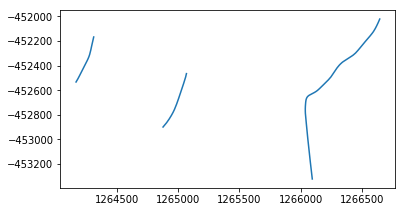

In [98]:
ax = 
intersecting_roads.plot();

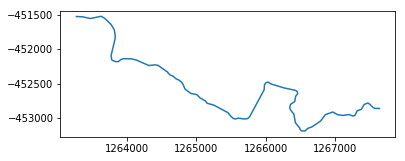

In [94]:
stream.to_crs(gdf_roads.crs).plot();